In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
#faylni yuklab, qiymat berilmagan qatorlarni tashlab yuboramiz
df = pd.read_csv("train_dataset.csv")
df=df.dropna()
df=df.reset_index(drop=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,...,4,4,1,4,4,4,3,21,12.0,0
9968,9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9969,9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,...,4,4,4,4,3,4,3,37,38.0,1
9970,9999,Female,Loyal Customer,41,Business travel,Business,90,4,1,4,...,3,4,5,5,5,4,5,64,210.0,1


In [3]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
#sonli ustunlar nomlari
df.describe().columns

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df_son=df[['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction']]
df_son.corrwith(df["satisfaction"]).abs().sort_values()

id                                   0.002581
Gate location                        0.007422
Departure Delay in Minutes           0.043456
Arrival Delay in Minutes             0.048650
Departure/Arrival time convenient    0.067758
Age                                  0.145327
Ease of Online booking               0.164025
Food and drink                       0.206881
Checkin service                      0.232337
Inflight service                     0.240580
Baggage handling                     0.248839
Inflight wifi service                0.277497
Flight Distance                      0.298484
Cleanliness                          0.310046
Leg room service                     0.325405
On-board service                     0.327361
Seat comfort                         0.342061
Inflight entertainment               0.401109
Online boarding                      0.504671
satisfaction                         1.000000
dtype: float64

In [6]:
#sonli ustunlardan satisfactionga eng ko'p aloqador 3 tasini ajratib oldik
df_son_corr=df_son[['Online boarding','Inflight entertainment','Seat comfort']]

In [7]:
#Endi esa matnli ustunlarni songa o'zgartirib, ular bilan ham aloqadorlikni topamiz
df_harf=df[['Gender', 'Customer Type', 'Type of Travel', 'Class']]

df2son=OrdinalEncoder().fit_transform(df_harf)
df2son=pd.DataFrame(df2son)
df2son.columns=[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
df2son["satisfaction"]=df["satisfaction"].values
c=df2son.corr().abs()
c.style.background_gradient(cmap="coolwarm")

,"('Gender',)","('Customer Type',)","('Type of Travel',)","('Class',)","('satisfaction',)"
Gender,1.000000,0.025878,0.021716,0.010296,0.002007
Customer Type,0.025878,1.000000,0.279872,0.059022,0.181535
Type of Travel,0.021716,0.279872,1.000000,0.493248,0.481773
Class,0.010296,0.059022,0.493248,1.000000,0.464452
satisfaction,0.002007,0.181535,0.481773,0.464452,1.000000


In [8]:
#barcha ko'p aloqasi bor ustunlarni jamlaymiz
a = df2son[['Type of Travel', 'Class']]
a.columns=['Type of Travel', 'Class']
b = df_son_corr

tayyor = pd.merge(a, b, left_index=True, right_index=True)  
tayyor["satisfaction"]=df["satisfaction"].values
# tayyor.corrwith(df["satisfaction"]).abs().sort_values()
tayyor

,Type of Travel,Class,Online boarding,Inflight entertainment,Seat comfort,satisfaction
0,0.0,1.0,2,4,4,0
1,0.0,0.0,5,5,4,1
2,0.0,1.0,4,1,3,0
3,0.0,0.0,2,2,2,1
4,1.0,1.0,3,4,4,0
...,...,...,...,...,...,...
9967,1.0,1.0,5,4,4,0
9968,0.0,2.0,3,4,3,0
9969,0.0,0.0,4,4,5,1
9970,0.0,0.0,4,3,5,1


In [9]:
#train va test qismlarga ajratib, model uchun tayyor holatga keltiramiz
X = tayyor.drop("satisfaction", axis=1)
y = tayyor['satisfaction']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1013
           1       0.90      0.85      0.88       982

    accuracy                           0.88      1995
   macro avg       0.88      0.88      0.88      1995
weighted avg       0.88      0.88      0.88      1995

Model aniqligi: 0.8817042606516291


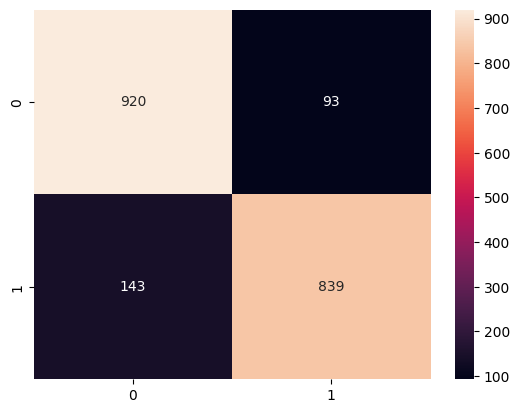

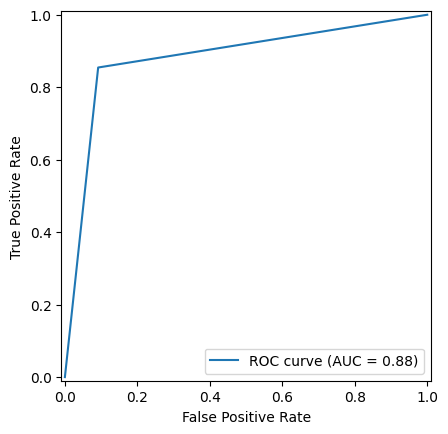

In [10]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [11]:
#modelni butun baza uchun qo'llab ko'ramiz
y_pr = xgb_model.predict(X)
m=mean_absolute_error(y_pr, y)
m
#modelimizning aniqligi 90%ga teng bo'lib chiqdi

0.10960689931809066

In [12]:
# Endi yakuniy bosqich, ya'ni modelimizni test qilib ko'ramiz
test_baza=pd.read_csv("test_dataset.csv")

test_baza_son=test_baza[['Online boarding','Inflight entertainment','Seat comfort']]

test_harf=test_baza[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
testson=OrdinalEncoder().fit_transform(test_harf)
testson=pd.DataFrame(testson)
testson.columns=[['Gender', 'Customer Type', 'Type of Travel', 'Class']]

m = testson[['Type of Travel', 'Class']]
m.columns=['Type of Travel', 'Class']
n = test_baza_son

In [13]:
#Modelimizga test bazamizni qo'yib ko'ramiz
test_tayyor = pd.merge(m, n, left_index=True, right_index=True) 

Natija = xgb_model.predict(test_tayyor)
Natija

array([0, 0, 1, ..., 0, 1, 0])